# Ficititious Play

Author: Yuya Furusawa

*Graduate School of Economics, University of Tokyo*

This note demonstrates how to use `fictplay` Python library.

In [1]:
import matplotlib.pyplot as plt
import ternary
from quantecon.game_theory.fictplay import FictitiousPlay, StochasticFictitiousPlay
import numpy as np

Fictitious play is first introduced as a learning model by Brown(1951) and Robinson(1951). In fictitious play model, players choose their strategies to maximize their payoffs with the beliefs such that their opponents will play each strategy with the probability equal to its historical frequencies.

We can regard fictitious play model as the algorithm to get a Nash equilibrium.

## Model

- $i = 1, 2$ : players
- $S_i$ : the finite set of pure-strategies for player $i$
    - $S = S_1 \times S_2$ : the set of pure-strategy profile
    - $s_i \in S_i$ : one of the $i$'s strategy
- $\Sigma_i$ : the set of mixed-strategies for player $i$
    - $\Sigma = \Sigma_1 \times \Sigma_2$ : the set of mixed-strategy profile
    - $\sigma_i \in \Sigma_i$ : one of the $i$'s mixed strategy
- $u_i(s_i, \sigma_{-i})$ : $i$'s expected utility if he chooses pure strategy $s_i$ and his opponents act according to $\sigma_{-i}$

After each round of play, players observe the actual actions chosen by opponents, and they choose strategies in the next round given histories of opponents actions. When a player choose a mixed strategy, its mixing is not observed, that is, histories of play consist of pure-strategy profiles.

- $t = 1, 2, \cdots$: dates
- $s^{\tau} \in S$ : strategy profile at date $\tau$
- $\zeta^t = (s^1, \cdots, s^{t-1})$ : history of play up to $t$
    - $\zeta^1$ indicates null history
- $\mathcal{Z}^t$ : the set of all histories of play up to $t$
    - by construction, $\mathcal{Z}^1$ is the singleton set consisting of the null history
    - $\mathcal{Z}$ : the set of all possible infinite histories
- $\kappa(\zeta^t)(s_i)$ : the number of times that $i$ played $s_i$ in the $t-1$ observations that comprise $\zeta^t$
    - player $i$ has an exogenous initial weight function $\kappa_i(\zeta^1) : S_{-i} \rightarrow \mathcal{R}_+$

Weight function is updated by adding 1 to the weight of each opponent strategy each time it is played so that:

\begin{equation}
\kappa_i(\zeta^t)(s_{-i}) = \kappa_i(\zeta^{t-1})(s_{-i}) + \left\{ \begin{array}{ll}
    1 & (s_{-i}^{t-1} = s_{-i}) \\
    0 & (s_{-i}^{t-1} \neq s_{-i})
  \end{array} \right.
\end{equation}

Each player assess concerning the behavior of his opponents at each date and contingent on history

- $\mu_i^t : \mathcal{Z}^t \rightarrow \Sigma_{-i}$ : $i$'s assessment over the possible pure-strategy profiles that his opponents will choose at date $t$

Then, $\mu_i$ is given by normalizing the $\kappa_i$, that is,

\begin{equation}
\mu_i^t (\zeta^t)(s_{-i}) = \frac{\kappa_i (\zeta^t)(s_{-i})}{\sum_{\tilde{s}_{-i} \in S_{-i}}\kappa_i (\zeta^t)(\tilde{s}_{-i})}
\end{equation}

Each player takes best response, which is a maximizer of 

\begin{equation}
\sum_{s_{-i} \in S_{-i}} u_i(\sigma_i, s_{-i}) \mu_i^t (\zeta^t)(s_{-i})
\end{equation}

over all $\sigma_i \in \Sigma_i$

It is well known that if fictitious play converges to some distribution, those possibilities correspond to Nash equilibrium. However, fictitious play does not always converge. It converges to Nash equilibrium for a two-player game when, for example

- Both players have finite strategies and the game is a zero-sum game
- The game that is a [potential game](https://en.wikipedia.org/wiki/Potential_game)
- The game that is solvable by [Iterative Elimination of Strictly Dominated Strategies (IESDS)](https://en.wikipedia.org/wiki/Strategic_dominance#Iterated_elimination_of_strictly_dominated_strategies_.28IESDS.29)

## `FictitiousPlay` class

The `FictitiousPlay` class requires **payoff matrix**, which must be either 2-dimentional numpy array or `NormalFormGame` object.

### Creating `FictitiousPlay` class

Let's create the `FictitiousPlay` class with the following **matching pennies** payoff matrix

1$\backslash$2 | $A$           | $B$ 
 ------------- |---------------| ---------
 $A$           | 1, -1          |    -1, 1   
 $B$           | -1, 1          |   1, -1     

In [2]:
matching_pennies = [[( 1, -1), (-1,  1)],
                    [(-1,  1), ( 1, -1)]]
fp0 = FictitiousPlay(matching_pennies)

`N` attribute returns the number of players in this game

In [3]:
fp0.N

2

`players` attribute returns the tuple of `Player` instances of this game

In [4]:
fp0.players

(Player([[ 1, -1],
         [-1,  1]]),
 Player([[-1,  1],
         [ 1, -1]]))

`nums_actions` attribute returns the tuple of the number of actions for each player

In [5]:
fp0.nums_actions

(2, 2)

### `play` mathod

`play` method proceeds the game one step.

In [6]:
init_actions = (1,1)
fp0.play(actions=init_actions)

(array([0., 1.]), array([0.5, 0.5]))

You can proceed the game with `num_reps` keyword arguments.

In [7]:
fp0.play(actions=init_actions, num_reps=1000)

(array([0.51648352, 0.48351648]), array([0.49350649, 0.50649351]))

### `time_series` method

`time_series` returns the time series of mixed action profile.

In [8]:
fp0.time_series(init_actions=init_actions, ts_length=10)

(array([[0.        , 1.        ],
        [0.        , 1.        ],
        [0.33333333, 0.66666667],
        [0.5       , 0.5       ],
        [0.6       , 0.4       ],
        [0.66666667, 0.33333333],
        [0.71428571, 0.28571429],
        [0.75      , 0.25      ],
        [0.77777778, 0.22222222],
        [0.7       , 0.3       ]]),
 array([[0.        , 1.        ],
        [0.5       , 0.5       ],
        [0.66666667, 0.33333333],
        [0.75      , 0.25      ],
        [0.8       , 0.2       ],
        [0.66666667, 0.33333333],
        [0.57142857, 0.42857143],
        [0.5       , 0.5       ],
        [0.44444444, 0.55555556],
        [0.4       , 0.6       ]]))

## Simulations

### Two-Action Games

Consider the fictitious play model with **matching pennies** game defined above.

In [9]:
matching_pennies = [[( 1, -1), (-1,  1)],
                    [(-1,  1), ( 1, -1)]]
mp = FictitiousPlay(matching_pennies)

Let's simulate how players' mixed action profile converge to some distribution. 

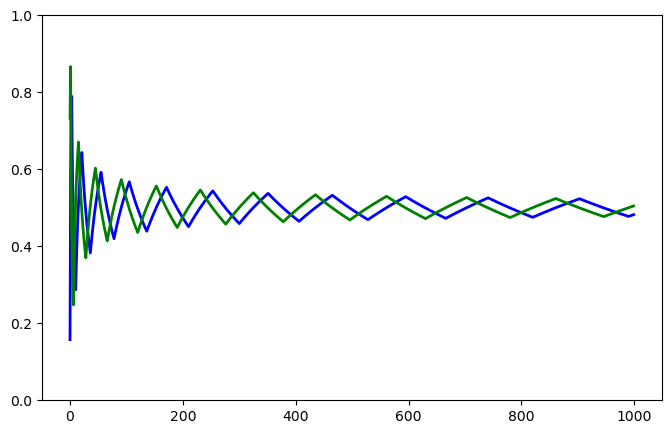

In [10]:
ts_length = 1000
series = mp.time_series(ts_length)

fig, ax = plt.subplots(figsize=(8, 5))
ax.set_prop_cycle('color', ['b', 'g'])
for x in series:
    ax.plot(x[:, 0], linewidth=2)
ax.set_ylim(0, 1)
plt.show()

Horizontal and vertical axis correspond to the period and the player's history for his opponent's first action. Blue(Green) line represents first(second) player's history.

As shown in the above graph, both players' mixed action profile converge to $0.5$, which is the mixed-strategy Nash equilibrium of the original game.

### Three-Action Games

Next, let's consider the fictitious play model  with 3 actions.

Consider the fictitious play model of **shapley game** whose payoff matrix is

1$\backslash$2 | $A$           | $B$    |$C$
 ------------- |---------------| ---------|-----------
 $A$           | 0, 0          |    1, 0   |   0,1
 $B$           | 0, 1          |   0, 0   |    1,0
 $C$           |1,0           | 0,1      | 0,0

In [11]:
shapley_game = [[(0, 0), (1, 0), (0, 1)],
                [(0, 1), (0, 0), (1, 0)],
                [(1, 0), (0, 1), (0, 0)]]
sg = FictitiousPlay(shapley_game)

In [12]:
sg.players

(Player([[0, 1, 0],
         [0, 0, 1],
         [1, 0, 0]]),
 Player([[0, 1, 0],
         [0, 0, 1],
         [1, 0, 0]]))

In [13]:
sg.nums_actions

(3, 3)

Let's simulate the convergence of players' mixed action profile in this model.

In [14]:
ts_length = 1000
series = sg.time_series(ts_length, init_actions=(0, 1))

To illustrate the dynamics of mixed action profiles, we use `python-ternary` library.

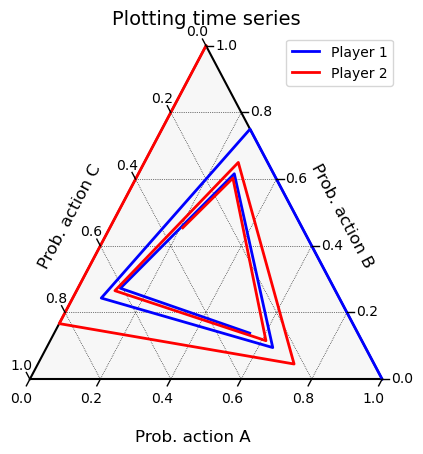

In [15]:
figure, tax = ternary.figure(scale=1.0)
figure.set_size_inches(5, 5)

tax.boundary()
tax.gridlines(multiple=0.2, color="black")
tax.set_title("Plotting time series", fontsize=14)
tax.left_axis_label("Prob. action C", fontsize=12, offset=0.14)
tax.right_axis_label("Prob. action B", fontsize=12, offset=0.14)
tax.bottom_axis_label("Prob. action A", fontsize=12, offset=0.14)

tax.plot(series[0], linewidth=2.0, label="Player 1", color='blue')
tax.plot(series[1], linewidth=2.0, label="Player 2", color='red')
tax.ticks(axis='lbr', multiple=0.2, linewidth=1, tick_formats="%.1f", offset=0.02)

tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()
tax.legend()
tax.show()

Blue(Red) line represents first(second) player's history of mixed action.

Shapley(1964) showed that in the normal fictitious play (not weighted fictitious play) if $(A, B)$ is choosen in the first period, then players' action profile does not converge. In particular, the fictitious play follows the cycle $(A, B) \rightarrow (A, C) \rightarrow (B, C) \rightarrow (B,A) \rightarrow (C,A) \rightarrow (C, B) \rightarrow (A, B) \rightarrow \cdots$

---

# Stochastic Fictitious Play

Stochastic fictitious play is first introduced by Fundenberg and Kreps(1993). In this model, each player's payoff is perturbed in each period by a random shock.

## Model

Almost all of the settings are the same as original fictitious play model except for perturbed payoff. Player's payoff at period $t$ is given by 

\begin{equation}
u_i^t (s_i^t, s_{-i}^t) + \eta_i(s_i^t)
\end{equation}

The random payoff shock $\eta_i$ is observable for each $i$, but player $i$ cannot observe opponents' payoff shock and its history. Let $\rho_i$ denote the probability distribution of each $\eta_i$ and $E_i$ denote the support of $\rho_i$.

In each period, players choose their strategy after observing payoff shock, so in the stage game strategy for each player is a mapping form $E_i$ to $S_i$.

Fundenberg and Kreps(1993) showed that in any $2 \times 2$ game that has a unique completely mixed Nash equilibrium, stochastic fictitious play converges with probability 1 with some assumptions.

In adddition, Hofbauer and Sandholm (2002) showed that in (i) two-player symmetric game with an interior [Evolutionary Stable Strategies(ESS)](https://en.wikipedia.org/wiki/Evolutionarily_stable_strategy) (ii) two-player zero sum game, and some game classes, stochastic fictitious play converges.

## `StochasticFictitiousPlay` class

`game_theory` module also provides `StochasticFictitiousPlay` class. In this class, we have to designate the distribution of payoff shocks. The statistical distribution must be [`scipy.stats`](https://docs.scipy.org/doc/scipy-1.1.0/reference/stats.html) object.

In [16]:
import scipy.stats

In [17]:
# standard normal distirbution
distribution = scipy.stats.norm()

## Simulations

Let's simulate stochastic fictitious play model. We set the distribution of payoff shock to standard normal distribution, which is defined above, in the next two examples.

### Two-Action Game

First, we consider matching penny game defined above.

In [18]:
mp_s = StochasticFictitiousPlay(matching_pennies, distribution)

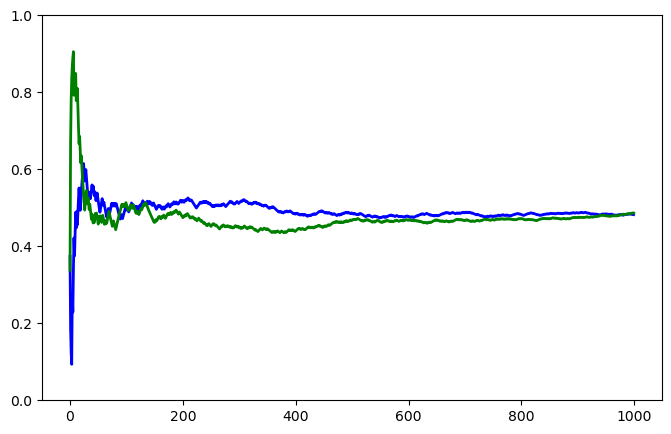

In [19]:
ts_length = 1000
series = mp_s.time_series(ts_length)

fig, ax = plt.subplots(figsize=(8, 5))
ax.set_prop_cycle('color', ['b', 'g'])
for x in series:
    ax.plot(x[:, 0], linewidth=2)
ax.set_ylim(0, 1)
plt.show()

As shown in the above graph, both players' action profile converges to  $0.5$ , which is the mixed-strategy Nash equilibrium of the original game. This result is consistent with Fudenberg and Kreps(1993). Combining with the result of standard fictitious play, in matching penny game, history converges under both standard and stochastic fictitious play model. 

### Three-Action Game

Next, we consider shapley game discussed above.

In [20]:
sg_s = StochasticFictitiousPlay(shapley_game, distribution)

In [21]:
ts_length = 1000
series = sg_s.time_series(ts_length, init_actions=(1, 0))

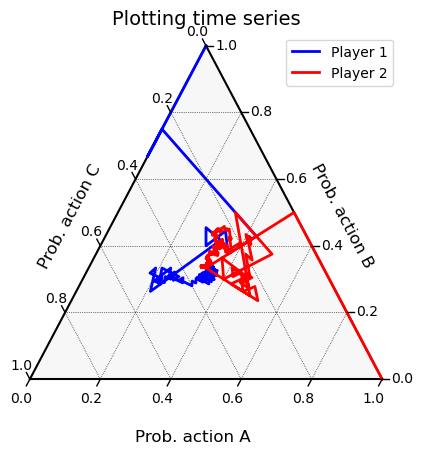

In [22]:
figure, tax = ternary.figure(scale=1.0)
figure.set_size_inches(5, 5)

tax.boundary()
tax.gridlines(multiple=0.2, color="black")
tax.set_title("Plotting time series", fontsize=14)
tax.left_axis_label("Prob. action C", fontsize=12, offset=0.14)
tax.right_axis_label("Prob. action B", fontsize=12, offset=0.14)
tax.bottom_axis_label("Prob. action A", fontsize=12, offset=0.14)

# Plot the data
tax.plot(series[0], linewidth=2.0, label="Player 1", color='blue')
tax.plot(series[1], linewidth=2.0, label="Player 2", color='red')
tax.ticks(axis='lbr', multiple=0.2, linewidth=1, tick_formats="%.1f", offset=0.02)

tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()
tax.legend()
tax.show()

Stochastic fictitious play converges to $(1/3, 1/3, 1/3)$ which is a mixed Nash equilibrium of this game. This  is consistent with the result of Hofbauer and Sandholm (2002) since $(1/3, 1/3, 1/3)$ is an interior ESS and a unique equilibrium. This result is quite different from the result of standard fictitious play model where shapley game does not converge. But Williams(2018) shows that if the variance of shocks is small, namely $\sigma < 0.0821$($\sigma$ is the standard deviation) in the normal case and $\lambda > 6$($\lambda$ is the parameter of type-II extreme distribution) in the logit case, this equilibrium is unstable.

## Stochastic Fictitious Play with constant gain

So far, we illustrate the fictitious play with decreasing gain.
Decreasing gain implies that players take their actions given opponents' all action history, actions at period 0 and at period n are treated equally.
You can also specify constant gain where players take their actions by opponents' action history but recent actions are weighted higher than old actions.
We see the stochastic fictitious play with constant gain.

Many literatures say fictitous play and stochastic fictitious play converge to some equilibria, but they doesn't say fictitous play converges to which equilibrium in most cases. Williams(2018) answers this question under stochastic fictitious play with constant gain. He shows that risk dominant equilibrium is stable.

Let's consider the model with the following **Coordination Game** payoff matrix

1$\backslash$2 | $A$           | $B$ 
 ------------- |---------------| ---------
 $A$           | 4, 4          |    0, 3   
 $B$           | 3, 0          |   2, 2    

In this game, (A,A) and (B,B) are both Nash equilibria, but action B is the risk dominat strategy.

In [23]:
coordination_game = [[( 4, 4), (0,  3)],
                    [(3, 0), ( 2, 2)]]
gain = 0.1
distribution = scipy.stats.norm(0, 0.33) # normal distribution with mean 0 and standard deviation 0.33
csfp = StochasticFictitiousPlay(coordination_game, distribution, gain=gain)

The following graph shows the probability of taking action B.

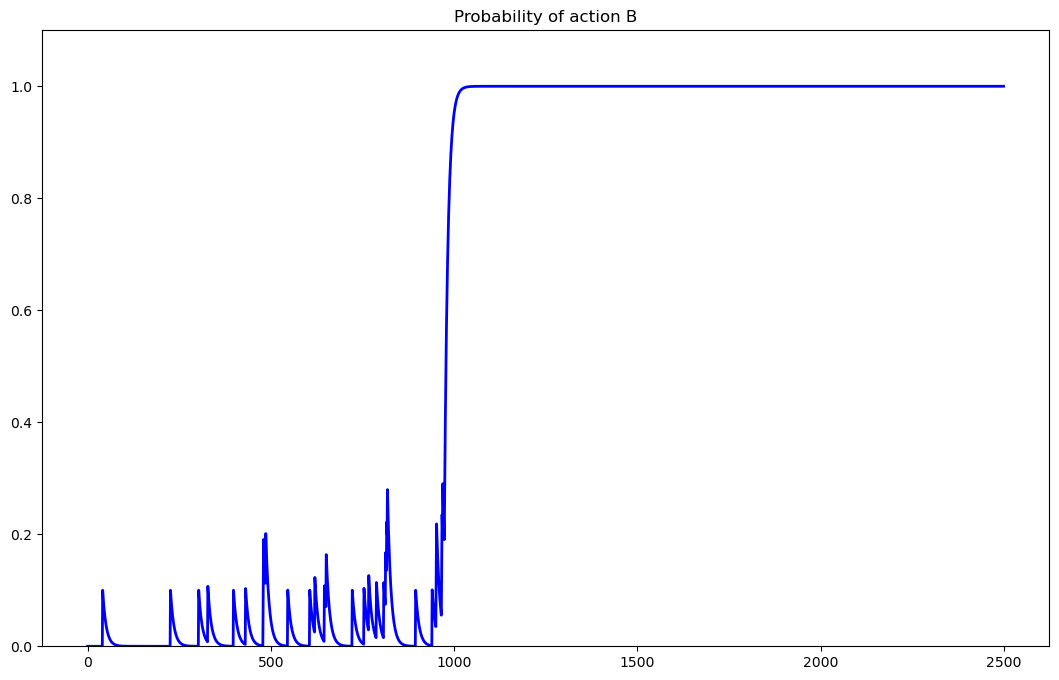

In [24]:
ts_length = 2500
init_actions = (0, 0) # initially all players take action A
series = csfp.time_series(ts_length, init_actions)

fig, ax = plt.subplots(figsize=(13, 8))
ax.set_prop_cycle('color', ['b'])
ax.plot(series[0][:, 1], linewidth=2)
ax.set_ylim(0, 1.1)
plt.title("Probability of action B")
plt.show()

As you can see, all players become to take action B which is a risk-dominant action.

---

# N-player  Game

So far, we consider two-player games with two or three actions for each player. We can extend the fictitous play model  to more general games where there are n players. Monderer and Shapley(1996) shows that in the game with identical payoff functions, players' beliefs converge.

Note that fictitious play model with n players in this note is different from the literature in the sense that players' beliefs are updated simply. That is, player  i 's belief for player  j  depends only on past player  j 's actions, not on other players' actions.

## Simulation

Consider **Cournot** game. First, we define the function `cournot` which creates `NormalFormGame` instance with some parameters.

In [25]:
from quantecon.game_theory import NormalFormGame, Player
from quantecon import cartesian

In [26]:
def cournot(a, c, N, q_grid):
    """
    Create a `NormalFormGame` instance for the symmetric N-player Cournot game
    with linear inverse demand a - Q and constant marginal cost c.

    Parameters
    ----------
    a : scalar
        Intercept of the demand curve

    c : scalar
        Common constant marginal cost

    N : scalar(int)
        Number of firms

    q_grid : array_like(scalar)
        Array containing the set of possible quantities

    Returns
    -------
    NormalFormGame
        NormalFormGame instance representing the Cournot game

    """
    q_grid = np.asarray(q_grid)
    payoff_array = \
        cartesian([q_grid]*N).sum(axis=-1).reshape([len(q_grid)]*N) * (-1) + \
        (a - c)
    payoff_array *= q_grid.reshape([len(q_grid)] + [1]*(N-1))
    payoff_array += 0  # To get rid of the minus sign of -0

    player = Player(payoff_array)
    return NormalFormGame([player for i in range(N)])

In [27]:
a, c = 80, 20
N = 3
q_grid = [10, 15]  # [1/3 of Monopoly quantity, Nash equilibrium quantity]

g_Cou = cournot(a, c, N, q_grid)

In [28]:
print(g_Cou)

3-player NormalFormGame with payoff profile array:
[[[[300, 300, 300],   [250, 250, 375]],
  [[250, 375, 250],   [200, 300, 300]]],

 [[[375, 250, 250],   [300, 200, 300]],
  [[300, 300, 200],   [225, 225, 225]]]]


Let's create `FictitiousPlay` instance with this `NormalFormGame`.

In [29]:
fp_Cou = FictitiousPlay(g_Cou)

You can access the number of  players and the number of actions for each player via attributes.

In [30]:
print(fp_Cou.N)
print(fp_Cou.nums_actions)

3
(2, 2, 2)


In [31]:
ts_length=50
init_actions=(0,0,0)

Following graph shows the probability of taking action 0, that is, producing 10.

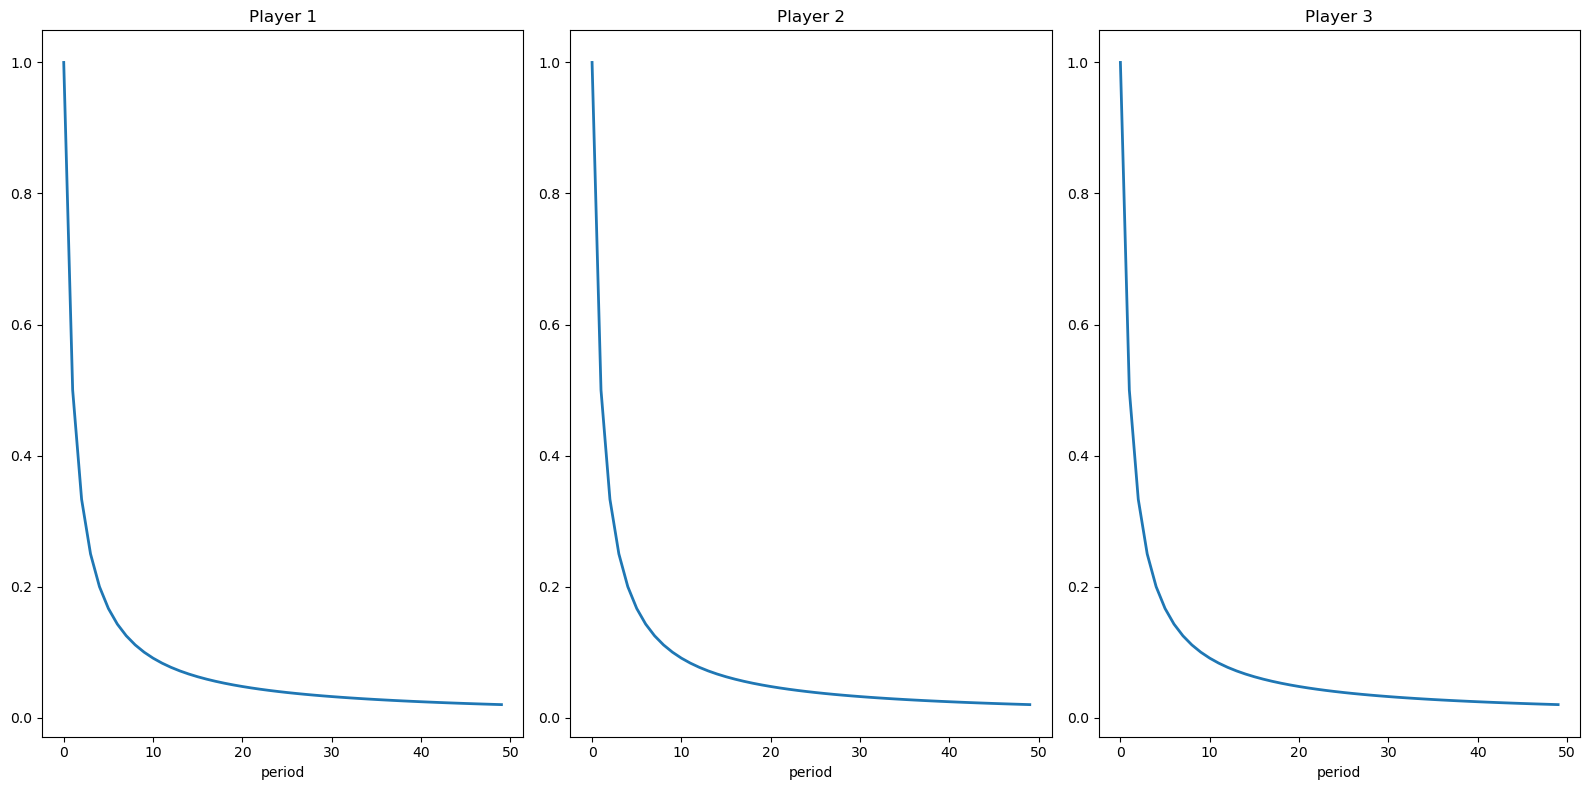

In [32]:
series = fp_Cou.time_series(ts_length, init_actions)
fig = plt.figure(figsize=(16,8))

ax1 = fig.add_subplot(131)
ax1.plot(range(ts_length), series[0][:,0], linewidth=2)
ax1.set_title("Player 1")
ax1.set_xlabel("period")

ax2 = fig.add_subplot(132)
ax2.plot(range(ts_length), series[1][:,0], linewidth=2)
ax2.set_title("Player 2")
ax2.set_xlabel("period")

ax3 = fig.add_subplot(133)
ax3.plot(range(ts_length), series[2][:,0], linewidth=2)
ax3.set_title("Player 3")
ax3.set_xlabel("period")

plt.tight_layout()
plt.show()

As you can see, all players take action 1(producing 15), which is the pure strategy Nash equilibrium.

---

# Reference

- Brown, G. W. 1951. Iterative solutions of games by fictitious play. In Activity Analysis of Production and Allocation, ed. by T.C.Koopmans. New York: Wiley.
- Robinson, J. 1951. An iterative method of solving a game. Annals of Mathmatics 54: 296-301.
- Shapley, L. 1964. Some topics in two-person games. In Advances in Game Theory, ed. by M. Drescher, L. S. Shapley, and A. W. Tucker. Princeton: Princeton University Press.
- Fudenberg, D., and D. Kreps. 1993. Learning mixed equilibria. Games and Economic Behavior 5: 320-67.
- Monderer, D., and Shapley, L. 1996. Fictitious Play Property for Games with Identical Interests. Journal of Economic Theory 68, 258-265
- Fudenberg, D., and D.K. Levine. 1998. The Theory of Learning in Games Cambridge: MIT Press.
- Hofbauer, J., and W. H. Sandholm. 2002. On the Global Convergence of Stochastic Fictitious Play. Econometrica Vol.70, No. 6: 2265-2294